In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('./../data/togo-dapaong_qc.csv')
df.describe()
df.info()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

(525600, 19)

In [3]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [4]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
nullAverage = df.isnull().mean() * 100
nullAverage = nullAverage[nullAverage > 5]
print(nullAverage)

Comments    100.0
dtype: float64


In [6]:
df = df.drop(columns=['Comments'])

In [7]:
columns_of_interest = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Percentage of missing values per column
missing_percent = df[columns_of_interest].isnull().mean() * 100
print(missing_percent[missing_percent > 0])

Series([], dtype: float64)


In [8]:
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].dropna()))
outliers = (z_scores > 3).sum(axis=0)
print("Outlier count per column:", outliers)

Outlier count per column: [ 305 1062 3415  137  206 3510 3915]


In [9]:
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    print(f"{col} < 0: {df[df[col] < 0].shape[0]}")
    if col in ['WS', 'WSgust']:
        print(f"{col} > 50: {df[df[col] > 50].shape[0]}")

GHI < 0: 257385
DNI < 0: 0
DHI < 0: 0
ModA < 0: 0
ModB < 0: 0
WS < 0: 0
WS > 50: 0
WSgust < 0: 0
WSgust > 50: 0


In [10]:
irr_cols = ['GHI']

# Replace negative values with NaN
for col in irr_cols:
    df[col] = df[col].mask(df[col] < 0)

# Impute with median 
for col in irr_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
print(df.isnull().sum())


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [12]:
rows, columns = df.shape
print(f"Number of rows: {rows} , Number of columns: {columns}")

Number of rows: 525600 , Number of columns: 18


In [13]:
z_scores = np.abs(stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].dropna()))
outliers = (z_scores > 3).sum(axis=0)
print("Outlier count per column:", outliers)

Outlier count per column: [ 997 1062 3415  137  206 3510 3915]


In [14]:
df.to_csv('./../data/togo-depaong_clean.csv', index=False)

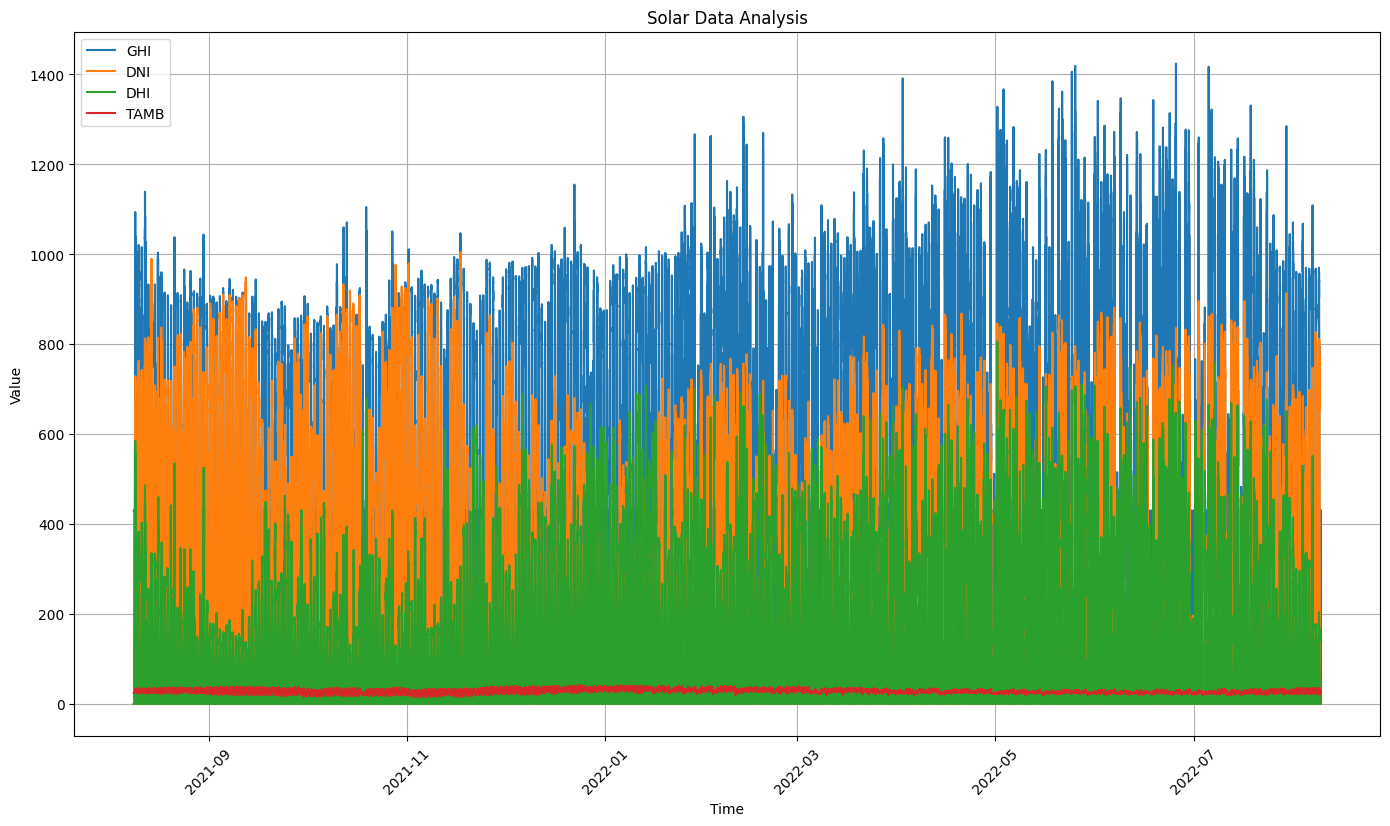

In [15]:
df['Timestamp'] = pd.date_range(start='2021-08-09', periods=len(df), freq='1min')

# 3. Set Timestamp as index
df.set_index('Timestamp', inplace=True)

# 4. Create the plot
plt.figure(figsize=(14, 8))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:  # using lowercase as that's how they appear in your data
    plt.plot(df.index, df[col], label=col.upper())

plt.title('Solar Data Analysis')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

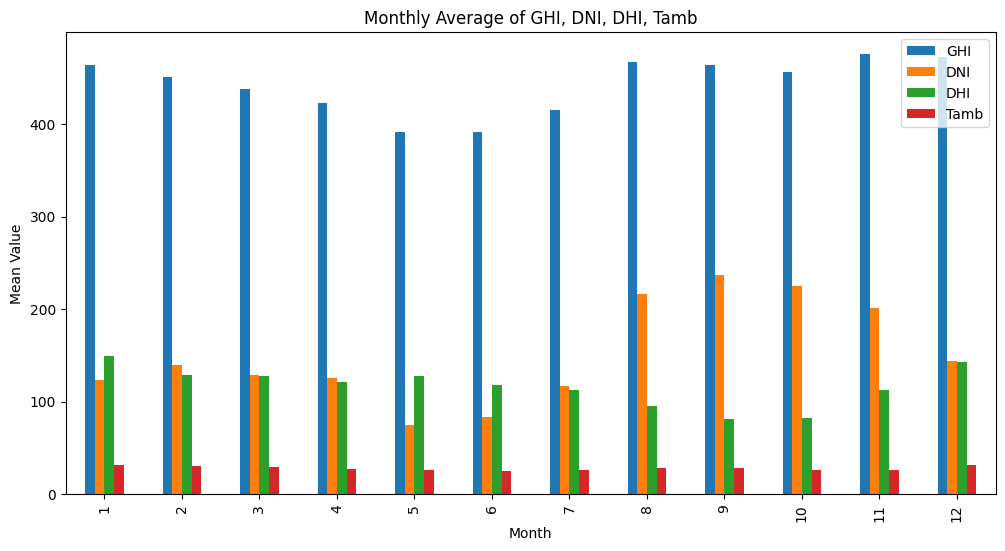

In [16]:
df['Month'] = df.index.month
df['Hour'] = df.index.hour
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Average of GHI, DNI, DHI, Tamb')
plt.ylabel('Mean Value')
plt.show()

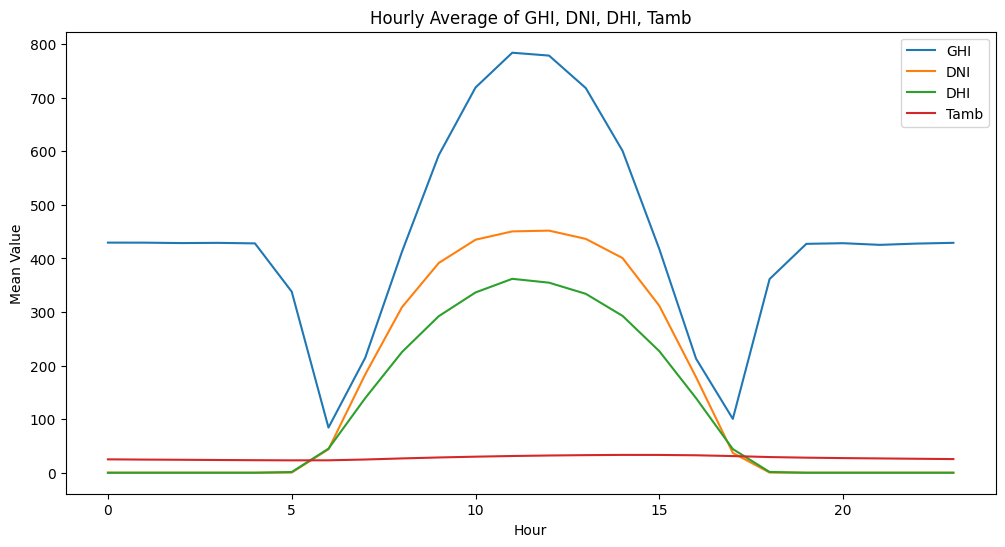

In [17]:
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
hourly_avg.plot(figsize=(12,6))
plt.title('Hourly Average of GHI, DNI, DHI, Tamb')
plt.ylabel('Mean Value')
plt.show()

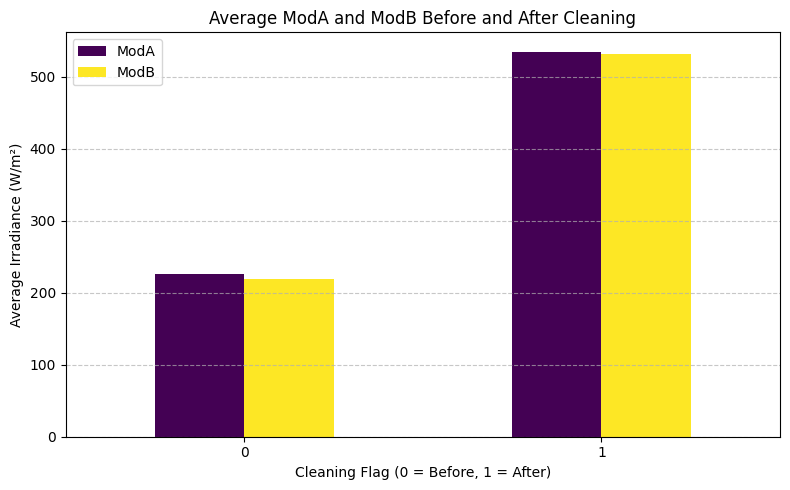

In [18]:
avg_mods = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot
avg_mods.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Average ModA and ModB Before and After Cleaning')
plt.ylabel('Average Irradiance (W/m²)')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


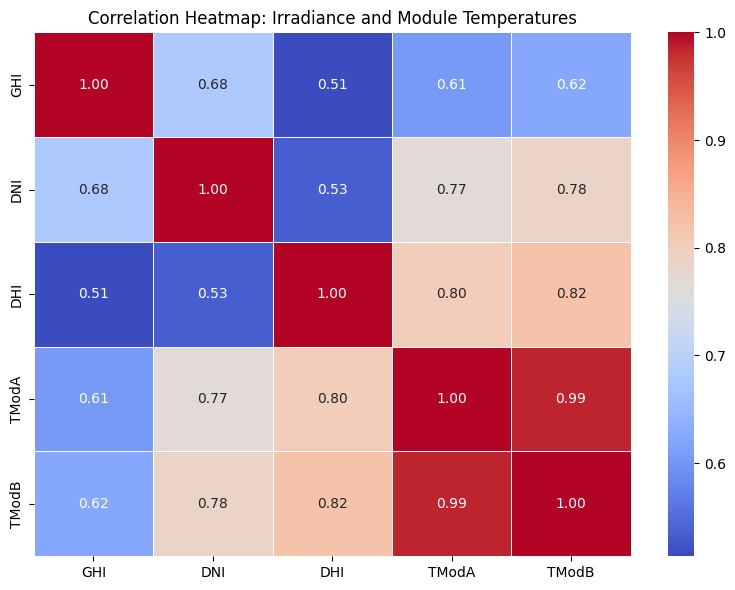

In [19]:
cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Irradiance and Module Temperatures')
plt.tight_layout()
plt.show()

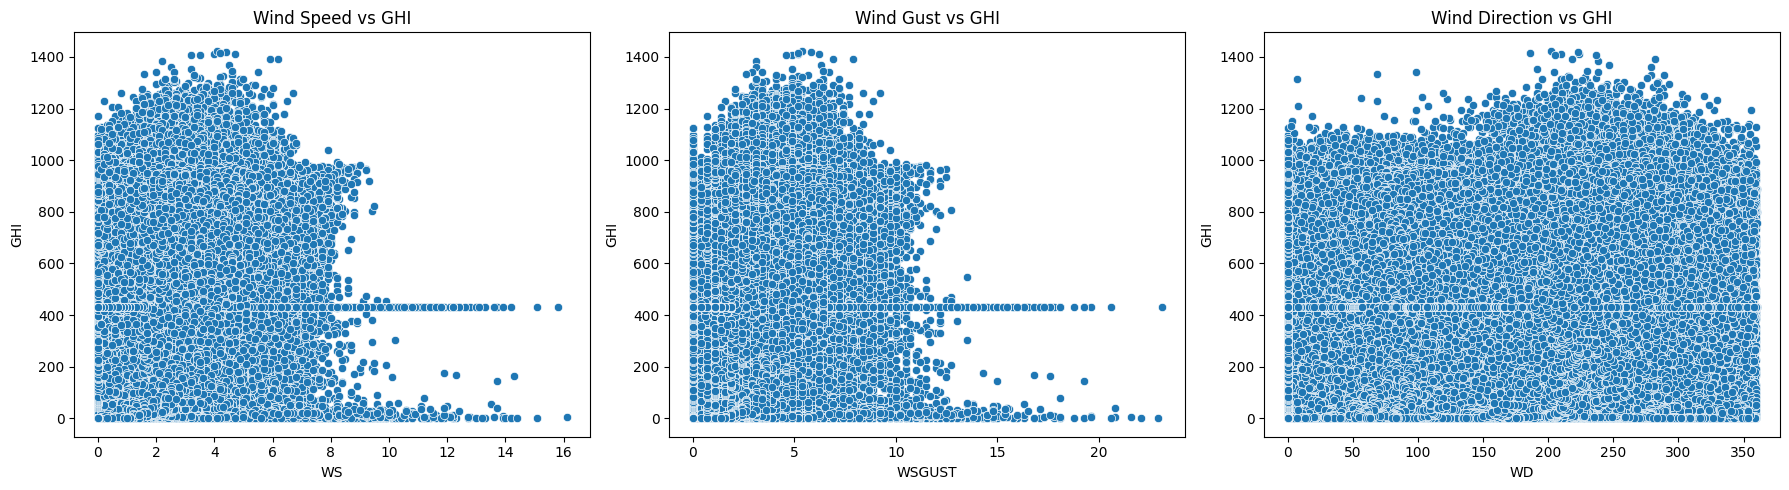

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=df, x='WS', y='GHI', ax=axs[0])
axs[0].set_title('Wind Speed vs GHI')

sns.scatterplot(data=df, x='WSgust', y='GHI', ax=axs[1])
axs[1].set_title('Wind Gust vs GHI')

sns.scatterplot(data=df, x='WD', y='GHI', ax=axs[2])
axs[2].set_title('Wind Direction vs GHI')

for ax in axs:
    ax.set_xlabel(ax.get_xlabel().upper())
    ax.set_ylabel('GHI')

plt.tight_layout()
plt.show()

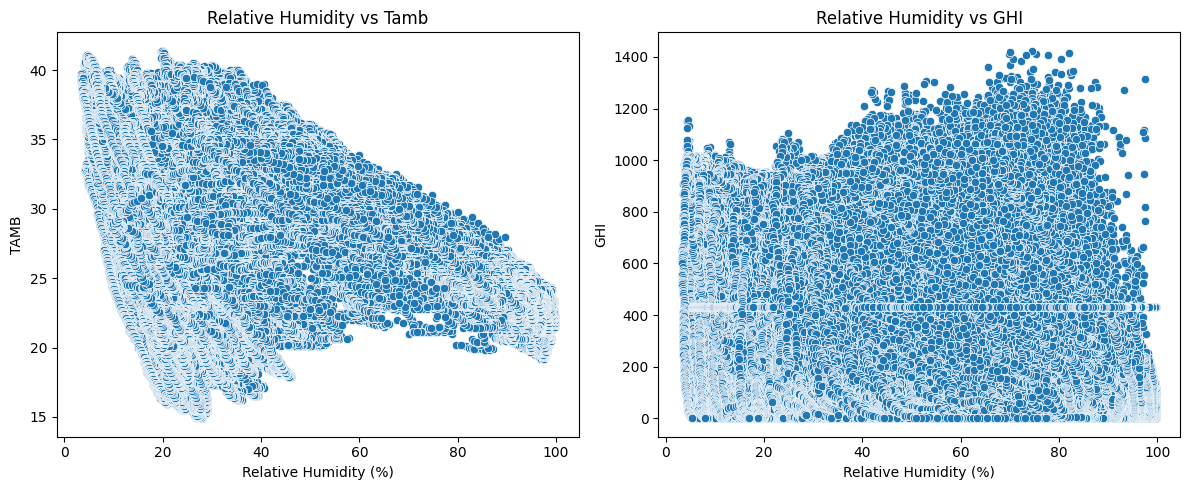

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=df, x='RH', y='Tamb', ax=axs[0])
axs[0].set_title('Relative Humidity vs Tamb')

sns.scatterplot(data=df, x='RH', y='GHI', ax=axs[1])
axs[1].set_title('Relative Humidity vs GHI')

for ax in axs:
    ax.set_xlabel('Relative Humidity (%)')
    ax.set_ylabel(ax.get_ylabel().upper())

plt.tight_layout()
plt.show()

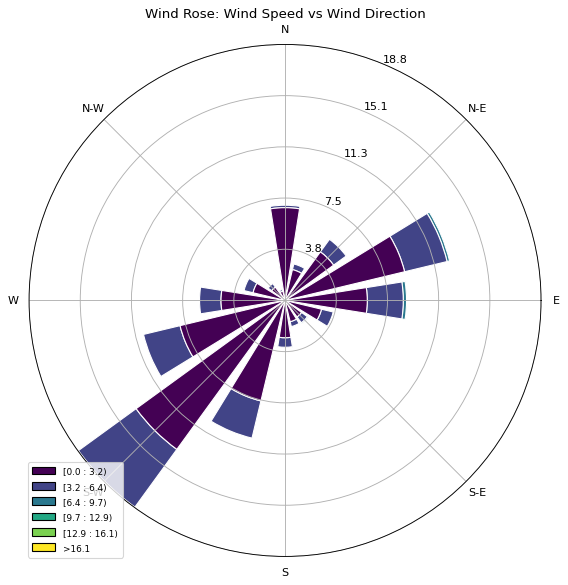

In [22]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose: Wind Speed vs Wind Direction')
plt.show()

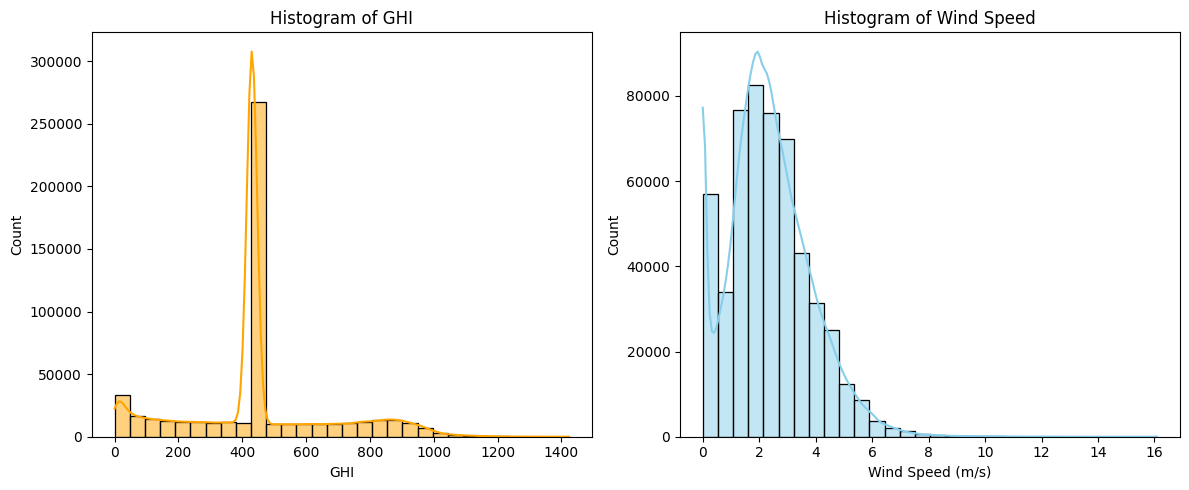

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['GHI'], bins=30, kde=True, ax=axs[0], color='orange')
axs[0].set_title('Histogram of GHI')
axs[0].set_xlabel('GHI')

sns.histplot(df['WS'], bins=30, kde=True, ax=axs[1], color='skyblue')
axs[1].set_title('Histogram of Wind Speed')
axs[1].set_xlabel('Wind Speed (m/s)')

plt.tight_layout()
plt.show()

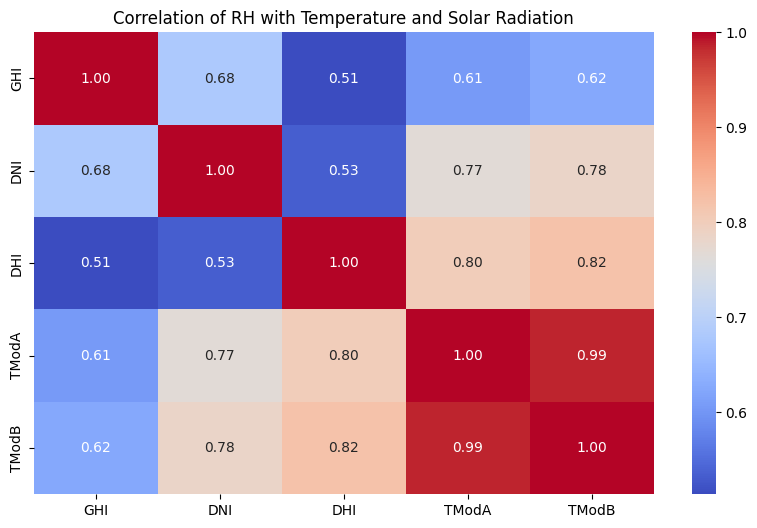

In [24]:
Cols = ['rh', 'tamb', 'tmoda', 'tmodb', 'ghi', 'dni', 'dhi']
correlation_matrix = df[cols].corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of RH with Temperature and Solar Radiation")
plt.show()

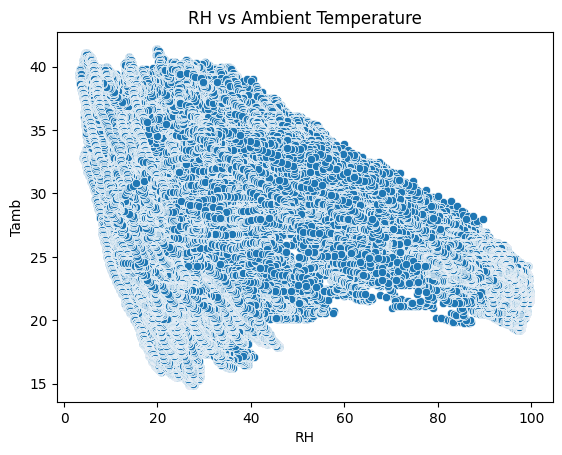

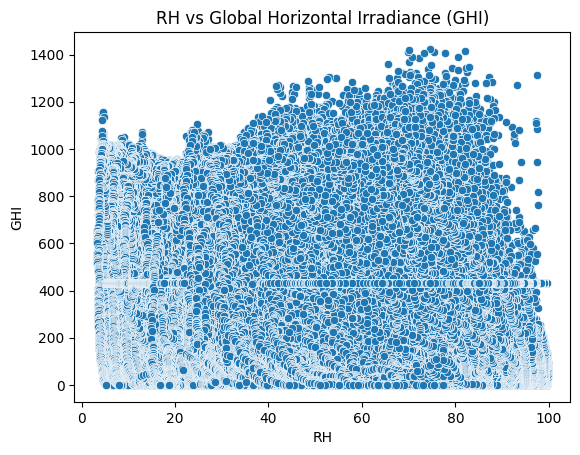

In [25]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Ambient Temperature')
plt.show()

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()

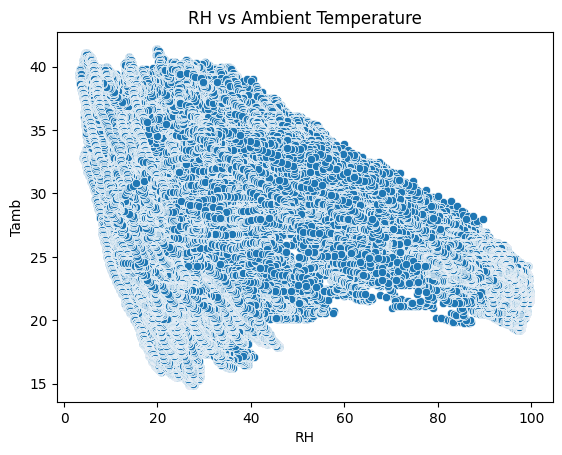

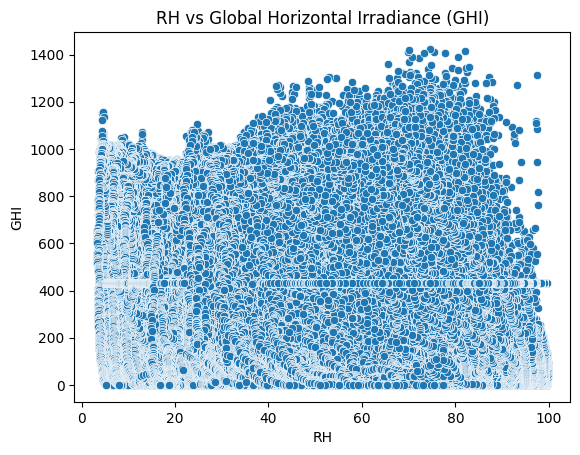

In [26]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('RH vs Ambient Temperature')
plt.show()

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('RH vs Global Horizontal Irradiance (GHI)')
plt.show()

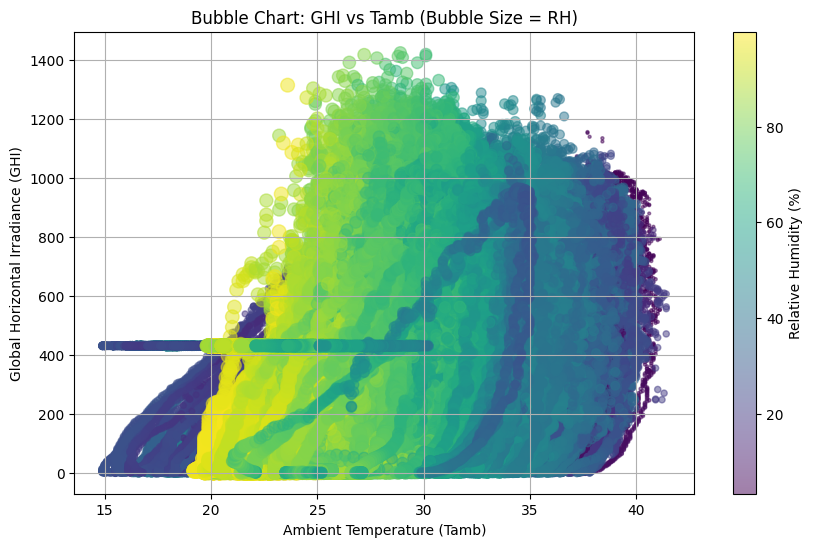

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5, c=df['RH'], cmap='viridis')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Global Horizontal Irradiance (GHI)')
plt.title('Bubble Chart: GHI vs Tamb (Bubble Size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()